# Time Series Analysis
# ====================
时间序列分析是一种统计学方法，专注于按时间顺序排列的数据点序列的分析和建模。在这种分析中，时间是一个关键的独立变量，数据点通常是在连续或固定的时间间隔内收集的。时间序列分析的目的是理解数据背后的潜在结构和模式，从而进行有效的预测或洞察。

时间序列数据的例子包括每日股票价格、每月销售额、年度人口增长等。这类分析广泛应用于经济学、金融、气象学、环境科学、工程和许多其他领域。

时间序列分析主要包括以下几个关键方面：

1. **趋势分析**：识别数据中的长期趋势，例如上升、下降或稳定趋势。
2. **季节性分析**：检测和量化数据中的季节性模式，即在固定时间周期内重复出现的模式。
3. **周期性分析**：与季节性类似，但周期长度不固定，可能受到外部因素影响。
4. **波动性分析**：研究时间序列的波动或不稳定性，以了解数据的不确定性或风险水平。
5. **异常检测**：识别数据中的异常值或突变点，这些可能表明了重要事件的发生或数据收集中的错误。

时间序列分析使用的技术和模型有很多，包括但不限于自回归模型（AR）、移动平均模型（MA）、自回归移动平均模型（ARMA）、自回归积分移动平均模型（ARIMA）、季节性自回归积分移动平均模型（SARIMA）和基于机器学习的方法，如长短期记忆网络（LSTM）等。选择哪种方法取决于数据的特性、分析的目的以及模型的复杂性和精确性要求。

Python实现时间序列分析的常用库主要为`statsmodels`，该库提供了常用的时间序列分析方法和模型，包括ARIMA、SARIMA、VAR、VARMA、VARMAX、VECM等。此外，`statsmodels`还提供了一些统计检验方法，如ADF检验、Granger因果检验等，用于检验时间序列数据的平稳性、相关性等。

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 1. 常见的时间序列模型

1. **自回归模型（AR）**:
   - **原理**：AR模型假设当前值与其过去的值之间存在线性关系，即当前的观测值可以通过前面若干个观测值的加权和来预测。
   - **优点**：模型简单，易于理解和实现；适用于显示出明显自相关性的数据。
   - **缺点**：只适合处理平稳时间序列数据；对于非线性模式处理能力有限。

2. **移动平均模型（MA）**:
   - **原理**：MA模型将当前值视为过去若干个预测误差项的加权和。
   - **优点**：能有效处理数据中的随机波动。
   - **缺点**：同样只适合处理平稳时间序列；对长期依赖关系建模能力有限。

3. **自回归移动平均模型（ARMA）**:
   - **原理**：ARMA模型结合了AR和MA两种模型，既考虑了时间序列的自回归性，也考虑了移动平均性。
   - **优点**：比单独的AR或MA模型更灵活，能更好地拟合某些时间序列数据。
   - **缺点**：仍然只适用于平稳序列；模型参数选择和识别可能相对复杂。

4. **自回归积分移动平均模型（ARIMA）**:
   - **原理**：ARIMA模型在ARMA模型的基础上增加了差分操作，以处理非平稳时间序列。
   - **优点**：可以处理非平稳时间序列；适用范围广，灵活性高。
   - **缺点**：模型较为复杂，参数选择和模型识别可能较困难。

5. **季节性自回归积分移动平均模型（SARIMA）**:
   - **原理**：SARIMA模型在ARIMA模型的基础上加入了季节性因素的考虑，适用于具有明显季节性模式的时间序列。
   - **优点**：能够有效处理具有季节性模式的时间序列。
   - **缺点**：模型更加复杂，需要更多的参数来控制季节性成分。

6. **长短期记忆网络（LSTM）**:
   - **原理**：LSTM是一种特殊的循环神经网络（RNN），能够学习长期依赖信息，特别适合处理和预测时间序列中间隔较长的事件。
   - **优点**：能够处理非常长的序列，可以捕获复杂的非线性模式。
   - **缺点**：模型复杂，需要大量的数据来训练；计算成本高，调参复杂。

每种模型都有其适用的场景，选择合适的模型通常需要考虑数据的特性、问题的复杂度以及计算资源等因素。在实际应用中，可能需要尝试多种模型并比较它们的性能，以找到最适合特定数据和问题的模型。


对应ARIMA(p, d, q)模型，有以下几种常见的特殊情况:
- **ARIMA(p, 0, 0)**：自回归模型（AR）。
- **ARIMA(0, 0, q)**：移动平均模型（MA）。
- **ARIMA(p, 0, q)**：自回归移动平均模型（ARMA）。


# 2. ARIMA模型
ARIMA模型，全称为自回归积分移动平均模型（Autoregressive Integrated Moving Average Model），是一种广泛使用的时间序列预测方法。ARIMA模型结合了自回归（AR）、移动平均（MA）和差分积分（I）三个部分，旨在通过这三个组成部分捕捉时间序列数据中的不同特性。

### ARIMA模型的组成：

1. **自回归（AR）部分**：这一部分的思想是当前观测值可以表示为前几期观测值的线性组合加上误差项。自回归部分的阶数用$p$表示。
   
   $$
   AR(p): X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + ... + \phi_p X_{t-p} + \epsilon_t
   $$

2. **差分积分（I）部分**：差分操作的目的是使非平稳时间序列变得平稳，通过计算连续观测值之间的差来实现。差分的阶数用$d$表示。
   
   $$
   I(d): \Delta^d X_t = (1 - L)^d X_t
   $$

   其中，$\Delta^d X_t$表示经过$d$阶差分后的序列，$L$是滞后算子。

3. **移动平均（MA）部分**：这一部分表示当前观测值可以表示为前几期误差项的线性组合。移动平均部分的阶数用$q$表示。
   
   $$
   MA(q): X_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q}
   $$

综合起来，ARIMA模型可以表示为：

$$
ARIMA(p, d, q): (1 - \phi_1 L - \phi_2 L^2 - ... - \phi_p L^p)(1 - L)^d X_t = (1 + \theta_1 L + \theta_2 L^2 + ... + \theta_q L^q) \epsilon_t
$$

### 模型参数

1. **$p$ - 自回归(AR)阶数**：
   - $p$代表模型中自回归部分的阶数，即在当前值的预测中使用的过去值的数量。自回归部分是基于变量自身过去值的线性回归。
   - 自回归模型的形式为$X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + ... + \phi_p X_{t-p} + \epsilon_t$，其中$\phi_1, \phi_2, ..., \phi_p$是模型参数，$X_{t-1}, X_{t-2}, ..., X_{t-p}$是$t$时刻之前的$p$个观测值，$\epsilon_t$是误差项。
   
2. **$d$ - 差分阶数**：
   - $d$代表为了使序列平稳而进行的差分次数。差分是指连续观测值之间的差异，用于消除时间序列中的趋势和季节性成分，使序列变得平稳。
   - 对于非平稳时间序列，差分可以帮助去除趋势和季节性，使序列达到平稳状态。$d$阶差分表示连续进行$d$次单期差分操作：$\Delta^d X_t = \Delta (\Delta^{d-1} X_t)$，其中$\Delta X_t = X_t - X_{t-1}$。
   
3. **$q$ - 移动平均(MA)阶数**：
   - $q$代表模型中移动平均部分的阶数，即在模型中使用的预测误差项的数量。移动平均部分用于捕捉时间序列的随机波动（即“噪声”）。
   - 移动平均模型的形式为$X_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q}$，其中$\theta_1, \theta_2, ..., \theta_q$是模型参数，$\epsilon_{t-1}, \epsilon_{t-2}, ..., \epsilon_{t-q}$是$t$时刻之前的$q$个误差项。

总的来说，ARIMA模型通过这三个参数$p$、$d$、$q$的组合来捕捉时间序列的不同特性，包括自相关（AR部分）、非平稳性的消除（差分I部分）和随机波动（MA部分），使其能够适用于广泛的时间序列预测任务。

### Python实现示例：

假设我们有一组时间序列数据，接下来的Python代码示例将展示如何使用`statsmodels`库来拟合一个ARIMA模型。

ARIMA参数设置：
- **endog**：时间序列数据。
- **order**：ARIMA模型的阶数，即$(p, d, q)$，其中$p$是自回归阶数，$d$是差分阶数，$q$是移动平均阶数。
- **seasonal_order**：季节性ARIMA模型的阶数，即$(P, D, Q, S)$，其中$P$是季节性自回归阶数，$D$是季节性差分阶数，$Q$是季节性移动平均阶数，$S$是季节性周期长度。
- **trend**：趋势项，可选值为'c'（常数项）、'nc'（无常数项）、't'（线性趋势项）、'ct'（常数项和线性趋势项）。

该函数与sklearn中函数类似，先使用`fit()`方法拟合模型，然后使用`predict()`方法预测结果。

predict参数设置：
- **start**：预测起始时间点。
- **end**：预测结束时间点。
- **typ**：预测类型，可选值为'linear'（线性预测）或'levels'（水平预测）。
- **dynamic**：是否使用动态预测，即使用模型自身的预测值作为下一步的输入，而不是使用真实值。

#### 关于dynamic参数：
在`statsmodels`库中的`ARIMA`模型（或其它时间序列模型）的`predict`方法中，`dynamic`参数是一个重要的选项，它影响预测的方式。

### `dynamic=False`（默认）

- 当`dynamic`设置为`False`时，预测是递归地进行的，这意味着模型在进行预测时会使用实际观察到的历史数据点。例如，预测时间点`t+2`的值时，会使用时间点`t+1`的实际观测值（如果可用）作为预测的一部分。
- 这种方式在进行短期预测时通常会更准确，因为它利用了所有已知的实际观测值。

### `dynamic=True`

- 当`dynamic`设置为`True`时，从指定的开始点之后的预测将仅使用之前的预测值，而不是实际的观测值。这意味着一旦开始预测，就不再考虑后续的实际观测值，即使它们在预测期间变得可用。
- 这种方法有助于评估模型在真实情境中的预测性能，因为它模拟了只能依赖之前预测值进行预测的情况，这在某种程度上反映了模型在“看不见”未来数据时的预测能力。

### 示例说明

假设你有一个时间序列直到时间`t`的实际观测值，并想要预测`t+1`、`t+2`等时刻的值：

- 如果`dynamic=False`，那么在预测`t+2`时，模型会使用时间`t+1`的实际观测值（如果它是已知的）。
- 如果`dynamic=True`，则预测`t+2`时只会使用到`t`时刻及之前的信息，包括`t+1`时刻的预测值，而不使用`t+1`的实际观测值。

使用`dynamic=True`可以更好地理解模型在多步预测时的表现，特别是在模型的鲁棒性和长期预测能力方面，这对于评估模型在实际应用中的有效性非常重要。

#### Prediction
在使用 ARIMA 模型进行时间序列预测时，`model_fit.predict()` 方法和 `results.get_forecast()` 方法都可以用于生成预测值，但它们之间存在一些区别，特别是在用法和预测结果的详细信息方面。

### `model_fit.predict()`
- **用途**：通常用于在模型拟合后对训练集或已知时间范围内的数据点进行预测。
- **参数**：可以指定开始 (`start`) 和结束 (`end`) 点来决定预测的时间范围。
- **输出**：直接提供预测值序列，但不直接提供预测的置信区间。
- **适用场景**：当你需要预测模型已经拟合过的时间段内的值，或者当你只需要预测值而不需要置信区间时。

### `results.get_forecast()`
- **用途**：专门用于生成模型向未来的预测，尤其是超出了模型训练数据集的范围。
- **参数**：`steps` 指定了要预测的时间步长数，`typ='levels'` 确保预测值是在原始观测值的水平上。
- **输出**：提供了一个包含预测值的对象，此外还可以通过调用如 `conf_int()` 方法来获取预测的置信区间。
- **适用场景**：当你需要对未来的时间点进行预测，并且需要预测的置信区间来评估预测的不确定性时。

### 主要区别
- **预测范围**：`predict()` 方法通常用于模型已经见过的数据范围内的预测，而 `get_forecast()` 专门用于对未来时间点的预测。
- **置信区间**：`get_forecast()` 方法可以直接提供预测的置信区间，这对于评估预测的不确定性非常重要。相比之下，使用 `predict()` 方法时，获取置信区间可能需要额外的步骤。
- **输出形式**：`get_forecast()` 方法返回的是一个预测结果对象，包含了预测值、置信区间等信息，而 `predict()` 方法直接返回预测值的序列。

因此，选择哪种方法取决于你的具体需求，比如你是要预测已知时间范围内的值还是未来的值，以及你是否需要预测的置信区间等。在进行实际的时间序列分析时，明确你的需求和各方法的特点能帮助你更有效地进行预测。

                               SARIMAX Results                                
Dep. Variable:     time_series_column   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -134.584
Date:                Tue, 30 Jan 2024   AIC                            279.168
Time:                        13:53:57   BIC                            292.143
Sample:                             0   HQIC                           284.418
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9849      0.076     12.924      0.000       0.836       1.134
ar.L2         -0.9358      0.068    -13.794      0.000      -1.069      -0.803
ma.L1         -1.0953      0.452     -2.426      0.0

C:\Users\yhb\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


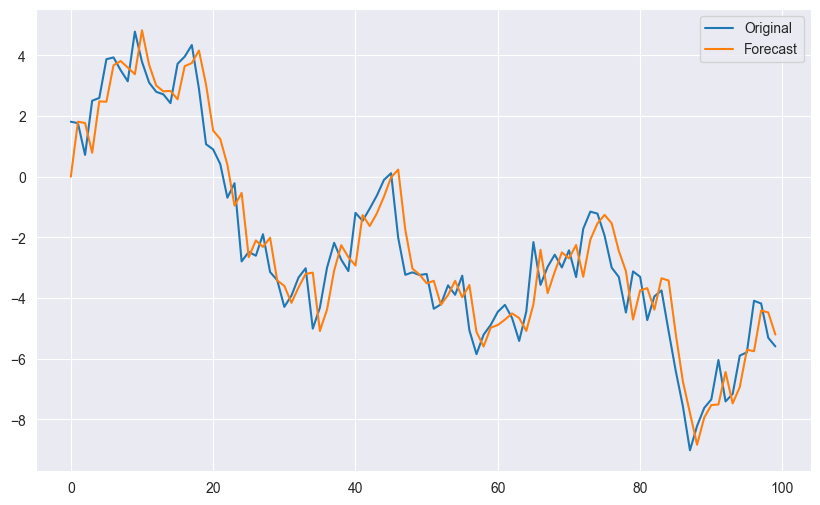

In [6]:
# 假设df是包含时间序列数据的DataFrame，其中'time_series_column'是时间序列列的名称
df = pd.DataFrame({
    "time_series_column": np.random.randn(100).cumsum()  # 生成示例数据,randn()生成标准正态分布的随机数,cumsum()累加。
})

# 拟合ARIMA模型，假定p=2, d=1, q=2
model = ARIMA(df['time_series_column'], order=(2, 1, 2))
model_fit = model.fit()

# 打印模型摘要
print(model_fit.summary())

# 绘制原始数据和预测值,typ='levels'表示预测水平值,即差分后的值,如果typ='linear'则表示预测增量值
df['forecast'] = model_fit.predict(start=0, end=len(df)-1, typ='levels')

plt.figure(figsize=(10, 6))
plt.plot(df['time_series_column'], label='Original')
plt.plot(df['forecast'], label='Forecast')
plt.legend()
plt.show()

# 3.LSTM模型